**Question 2**

The commercial banking industry is undergoing rapid changes due to advances in technology and competitive pressures in the financial services sector. The data file BANKS contains selected information
tabulated by Fortune concerning the revenues, profitability, and number of employees for the 51 largest US Commercial Banks in terms of revenues. Use the information in this file to complete the following:

**Features of dataset**

- Name        - Bank Name
- Revenues    - Revenues in $ million
- Profits     - Profits in $ million
- Employees   - Number of employees of the bank

In [10]:
# import all relevant python library

import pandas as pd              # data manipulation
import numpy as np               # computation purposes
import scipy.stats as stats      # statistical calculation
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
banks = pd.read_excel("Banks.xlsx", sheet_name="DATA")      # load dataset
banks.head()                                                # checking the dataset

,Name,Revenues,Profits,Employees
0,CITICORP,34697,3591,93700
1,CHASE MANHATTAN CORP.,30381,3708,69033
2,BANKAMERICA CORP.,23585,3210,77000
3,NATIONSBANK CORP.,21734,3077,80360
4,J.P.MORGAN & CO.,17701,1465,16943


In [12]:
banks.info()                                                    # checking the columns & data type
print("\n", "There are a total of row & columns", banks.shape)  # checking the total rows & column
print("\n", banks.isnull().sum())                               # checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       51 non-null     object
 1   Revenues   51 non-null     int64 
 2   Profits    51 non-null     int64 
 3   Employees  51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB

 There are a total of row & columns (51, 4)

 Name         0
Revenues     0
Profits      0
Employees    0
dtype: int64


a.  Compute the mean, median and standard deviation for the three variables: revenues, profits and number of employees.

In [13]:
# calculating the mean, median & standard deviation of revenues, profits & number of employees

print(banks.describe().T.round(), "\n")                     # compute the mean & standard deviation using pd describe method
print("Below are the median value of the three variables")
print(banks.median())                                       # compute variables using pd median method


           count     mean      std     min     25%      50%      75%      max
Revenues    51.0   6355.0   7458.0  1047.0  1836.0   3428.0   6884.0  34697.0
Profits     51.0    803.0    882.0    75.0   236.0    401.0    986.0   3708.0
Employees   51.0  21530.0  21269.0  3884.0  7733.0  11000.0  25336.0  93700.0 

Below are the median value of the three variables
Revenues      3428.0
Profits        401.0
Employees    11000.0
dtype: float64


b.  Consider Mellon Bank Corporation headquarters in Pittsburgh. Convert the data for each variable to z value. How does it compare to the average bank in the study on the three variables in part (a)?

In [14]:
# calculate z score of each variables, compare observation MELLON BANK CORP. with the mean score

banks["z_rev"] = stats.zscore(banks["Revenues"]).round(2)       # creating new column to compute z score for revenue, profits & employees
banks["z_pro"] = stats.zscore(banks["Profits"]).round(2)
banks["z_emp"] = stats.zscore(banks["Employees"]).round(2)
print(banks.head(3), "\n")                                      # checking the dataset with the new columns
mbc = banks[banks["Name" ] == "MELLON BANK CORP."]              # subset the dataset with text criteria
print(mbc)

                    Name  Revenues  Profits  Employees  z_rev  z_pro  z_emp
0               CITICORP     34697     3591      93700   3.84   3.19   3.43
1  CHASE MANHATTAN CORP.     30381     3708      69033   3.25   3.33   2.26
2      BANKAMERICA CORP.     23585     3210      77000   2.33   2.76   2.63 

                 Name  Revenues  Profits  Employees  z_rev  z_pro  z_emp
19  MELLON BANK CORP.      5134      771      27500  -0.17  -0.04   0.28


c.  As you can see by examining the data and by looking at statistics computed in part (a), not all banks had the same revenue, same profit or the same number of employees. Which variable had the greatest relative variation among the banks in the study?

In [15]:
# Which variable had the greatest relative variation among the banks in the study?

revenue = stats.variation(banks["Revenues"]).round(2)
profit = stats.variation(banks["Profits"]).round(2)
employees = stats.variation(banks["Employees"]).round(2)

print("CV revenue:", revenue)
print("CV profit:", profit)
print("CV employees :",employees)

CV revenue: 1.16
CV profit: 1.09
CV employees : 0.98


d.  Calculate a new variable: profits per employee. Develop a frequency distribution and histogram for this new variable. Also compute the mean, median and standard deviation for the new variable.

In [16]:
# create new variable profits per employee, frequency distribution & histogram, compute mean, median & std 

banks["Profits Per Employee"] = banks["Profits"]  / banks["Employees"].round(2)      # creating new column for profits per employee
print(banks.head(3))                                                                 # checking the dataset with the new column

                    Name  Revenues  Profits  Employees  z_rev  z_pro  z_emp  \
0               CITICORP     34697     3591      93700   3.84   3.19   3.43   
1  CHASE MANHATTAN CORP.     30381     3708      69033   3.25   3.33   2.26   
2      BANKAMERICA CORP.     23585     3210      77000   2.33   2.76   2.63   

   Profits Per Employee  
0              0.038324  
1              0.053713  
2              0.041688  


In [17]:
banks["Profits Per Employee"].describe().T.round(2)

count    51.00
mean      0.04
std       0.01
min       0.01
25%       0.03
50%       0.04
75%       0.04
max       0.09
Name: Profits Per Employee, dtype: float64

In [18]:
# creating a Profits Per Employee frequency distribution

freq_tab = banks["Profits Per Employee"].value_counts(bins = 10).sort_index()
print(freq_tab)

(0.0108, 0.0193]     2
(0.0193, 0.0268]     8
(0.0268, 0.0342]    14
(0.0342, 0.0417]    14
(0.0417, 0.0492]     7
(0.0492, 0.0566]     2
(0.0566, 0.0641]     1
(0.0641, 0.0715]     1
(0.0715, 0.079]      1
(0.079, 0.0865]      1
Name: Profits Per Employee, dtype: int64


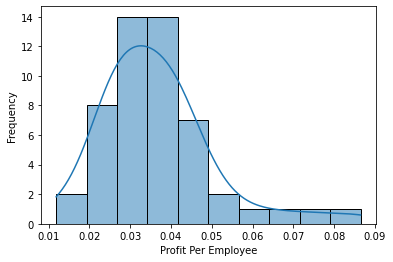

In [19]:
# creating a Profits Per Employee histogram

sns.histplot(x="Profits Per Employee", data=banks, kde=True, bins=10)    # select the Profits Per Employee column only
plt.xlabel("Profit Per Employee")
plt.xlabel("Profit Per Employee")
plt.ylabel("Frequency")
plt.show()

In [20]:
# compute mean, median & std 
print(banks["Profits Per Employee"].describe(), "\n")
print("The median value for Profits Per Employee is", banks["Profits Per Employee"].median())

count    51.000000
mean      0.036514
std       0.013978
min       0.011868
25%       0.027142
50%       0.035312
75%       0.042042
max       0.086466
Name: Profits Per Employee, dtype: float64 

The median value for Profits Per Employee is 0.0353125
